In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import random

from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions

# Load and Prepare Data

In [2]:
df = pd.read_csv("/Users/rose/Workspace/Random Forest_1/datasets_216167_477177_heart.csv")

df=df.rename(columns = {'target':'label'})
df.head()

df.shape

(1025, 14)

1    0.513171
0    0.486829
Name: label, dtype: float64

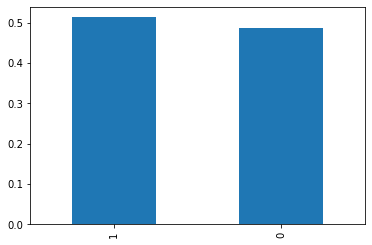

In [3]:
result = df.label.value_counts(normalize=True)
result.plot(kind="bar")
result

In [4]:
random.seed(0)

def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices,k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

train_df, test_df = train_test_split(df, test_size=0.2)


# Random Forest

In [5]:
# Create Bootraping
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped
# Create Forest
def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    return forest
# Make Prediction
def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

In [6]:
# Check the result
forest = random_forest_algorithm(train_df, n_trees=100, n_bootstrap=300, n_features=2, dt_max_depth=4)
predictions = random_forest_predictions(test_df, forest)

predictions_correct = predictions == test_df.label
predictions_correct.mean()

0.8634146341463415